# 1. Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg
import numpy as np
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
import pickle

# 2. Data Exploration

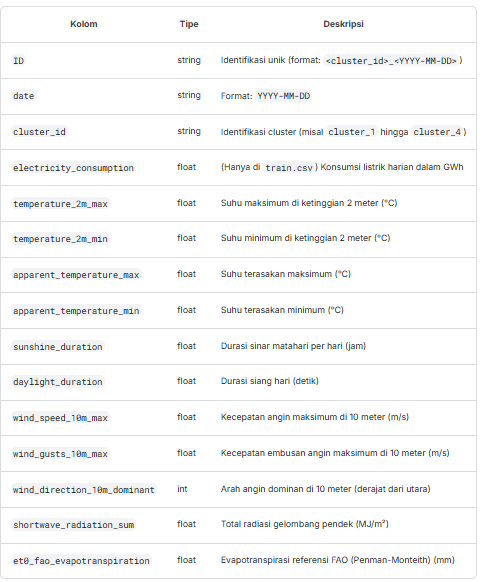
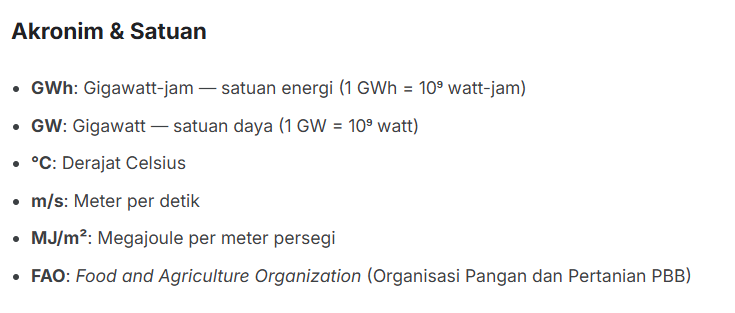

## 2.1 Import Dataset

In [2]:
df = pd.read_csv("../data/train.csv")
df.shape

(11688, 15)

## 2.2 Preview Dataset

In [3]:
df.head()

,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


## 2.3 Summary Of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

## 2.4 Summary Statistic Of Dataset

In [5]:
df.describe()

,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,642.313328,18.733385,7.174786,17.215315,4.784608,29302.656241,44070.779592,23.273058,46.420115,202.335554,12.742257,2.428585
std,287.673473,7.504161,5.960263,9.085303,7.260336,13600.113712,9283.839471,7.993389,15.226372,100.697741,7.588077,1.607845
min,207.472000,-1.900000,-10.800000,-8.100000,-15.400000,0.000000,29447.550000,6.800000,13.300000,0.002855,0.333333,0.173333
25%,414.376000,12.800000,2.500000,10.000000,-1.100000,19104.170833,35150.501667,17.400000,35.300000,134.384708,5.600000,0.990000
50%,602.672000,18.200000,7.100000,16.400000,4.400000,29917.360000,44185.056667,22.000000,43.900000,219.000000,12.140000,2.156667
75%,836.034500,24.300000,12.100000,24.000000,10.800000,40697.756667,52997.815833,28.000000,54.700000,281.609519,18.924167,3.616667
max,1658.348000,40.900000,23.200000,42.600000,23.800000,53498.910000,58501.420000,63.900000,126.700000,360.000000,29.983333,8.133333


## 2.5 Check For Missing Values

In [6]:
df.isnull().sum()

ID                             0
date                           0
cluster_id                     0
electricity_consumption        0
temperature_2m_max             0
temperature_2m_min             0
apparent_temperature_max       0
apparent_temperature_min       0
sunshine_duration              0
daylight_duration              0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
shortwave_radiation_sum        0
et0_fao_evapotranspiration     0
dtype: int64

# 3. Reformat Dataset & Exploration

## 3.1 Change Data Type (Object to Numerical)

In [7]:
df["cluster_id_int"] = df["cluster_id"].str.split('_').str[-1].astype(int)
df["year"] = df["date"].str.split('-').str[0].astype(int)
df["month"] = df["date"].str.split('-').str[1].astype(int)
df["day"] = df["date"].str.split('-').str[2].astype(int)

## 3.2 Delete Unuse Featire

In [8]:
df_cleaned = df.drop(labels=["ID", "date", "cluster_id"], axis=1)

## 3.3 Reorder Dataset

In [9]:
columns_shift_to_front = ["cluster_id_int", "year", "month", "day"]
columns = df_cleaned.columns.tolist()
remaining_columns = [col for col in columns if col not in columns_shift_to_front]
new_column_order = columns_shift_to_front + remaining_columns

df_cleaned = df_cleaned[new_column_order]

## 3.4 Preview Reordered Dataset

In [10]:
df_cleaned.head()

,cluster_id_int,year,month,day,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,1,2014,1,1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,2,2014,1,1,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,3,2014,1,1,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,4,2014,1,1,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,1,2014,1,2,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


## 3.5 Summary Statistic of Reordered Dataset

In [11]:
df_cleaned.describe()

,cluster_id_int,year,month,day,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,2.500000,2017.500342,6.522930,15.729637,642.313328,18.733385,7.174786,17.215315,4.784608,29302.656241,44070.779592,23.273058,46.420115,202.335554,12.742257,2.428585
std,1.118082,2.291236,3.448851,8.800469,287.673473,7.504161,5.960263,9.085303,7.260336,13600.113712,9283.839471,7.993389,15.226372,100.697741,7.588077,1.607845
min,1.000000,2014.000000,1.000000,1.000000,207.472000,-1.900000,-10.800000,-8.100000,-15.400000,0.000000,29447.550000,6.800000,13.300000,0.002855,0.333333,0.173333
25%,1.750000,2016.000000,4.000000,8.000000,414.376000,12.800000,2.500000,10.000000,-1.100000,19104.170833,35150.501667,17.400000,35.300000,134.384708,5.600000,0.990000
50%,2.500000,2017.500000,7.000000,16.000000,602.672000,18.200000,7.100000,16.400000,4.400000,29917.360000,44185.056667,22.000000,43.900000,219.000000,12.140000,2.156667
75%,3.250000,2020.000000,10.000000,23.000000,836.034500,24.300000,12.100000,24.000000,10.800000,40697.756667,52997.815833,28.000000,54.700000,281.609519,18.924167,3.616667
max,4.000000,2021.000000,12.000000,31.000000,1658.348000,40.900000,23.200000,42.600000,23.800000,53498.910000,58501.420000,63.900000,126.700000,360.000000,29.983333,8.133333


## 3.6 Create Correlation Heatmap

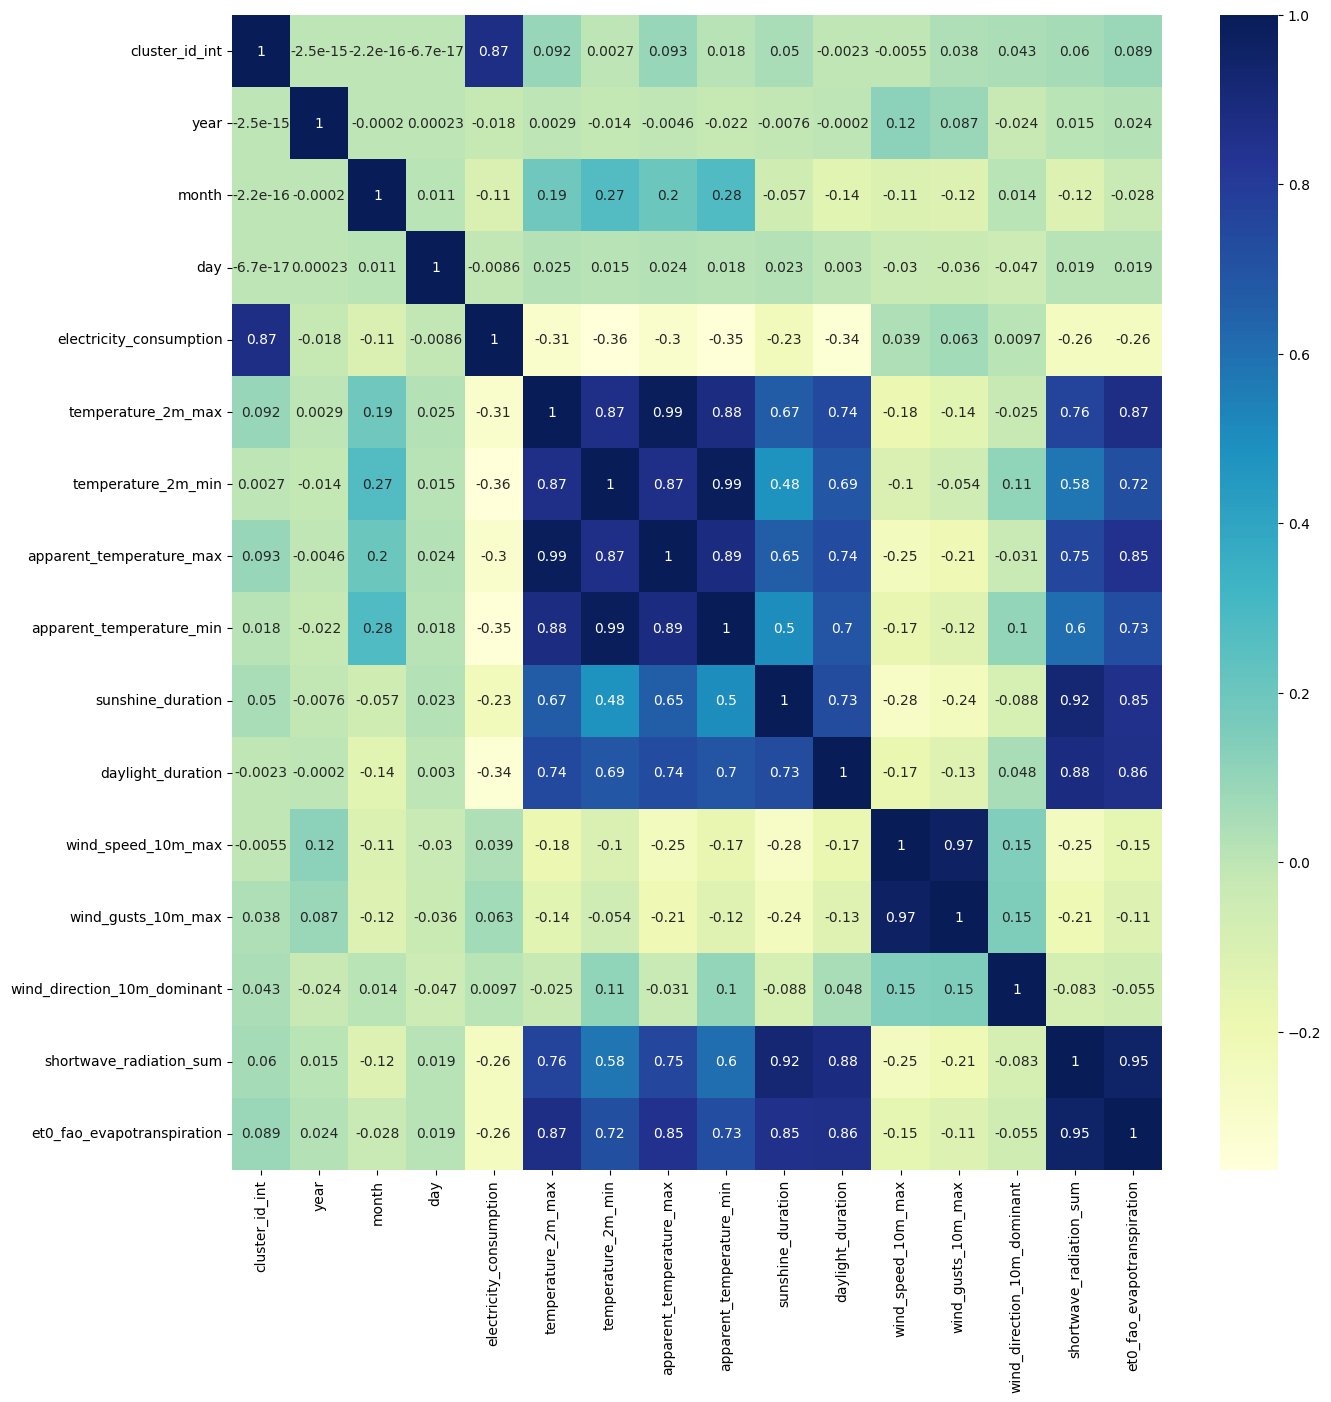

In [12]:
co_mtx = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(15, 15))
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)
plt.show()

# 4. Prepare Vectore Features and Target

## 4.1 Declare Feature Vector and Target Variable

In [13]:
X = df_cleaned.drop(labels=["electricity_consumption"], axis=1)
y = df_cleaned["electricity_consumption"]

In [14]:
X.head()

,cluster_id_int,year,month,day,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,1,2014,1,1,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,2,2014,1,1,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,3,2014,1,1,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,4,2014,1,1,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,1,2014,1,2,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000


In [15]:
y.head()

0     358.032
1     548.247
2     758.303
3    1072.077
4     386.908
Name: electricity_consumption, dtype: float64

In [16]:
data_dmatrix = xg.DMatrix(data=X,label=y)

## 4.2 Split Data Into Separate Training and Test Set 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# 5. Prepare Model

## 5.1 Set Params For XGBRegressor

In [18]:
params = {
    "n_estimators":1000, 
    "max_depth":7, 
    "eta":0.1, 
    "subsample":0.7, 
    "colsample_bytree":0.8,
}

## 5.2 Build Model

In [21]:
model = xg.XGBRegressor(**params)

## 5.3 Train and Test Model

In [22]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

In [23]:
y_pred = model.predict(X_test)

# 6. Evaluation

In [24]:
rmse = np.sqrt(MSE(y_test, y_pred))
rmse

45.09592294530964

# 7. Feature Importance

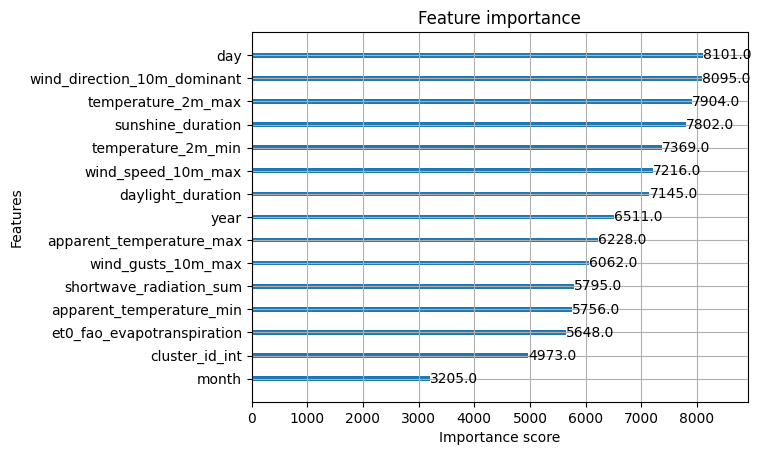

<Figure size 1600x1200 with 0 Axes>

In [25]:
xg.plot_importance(model)
plt.figure(figsize = (16, 12))
plt.show()